In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
vacinas = pd.read_excel("vacinas.xlsx", engine="openpyxl")
vacinas.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,VG_REINF,REINF,FAB_ADIC,LOT_RE_BI,FAB_RE_BI,DOSE_ADIC,DOS_RE_BI,LOTE_ADIC,TABAG,CASO_SRAG
0,07/03/2024,10,01/03/2024,9,SP,GVE XXV SANTOS,1349,SANTOS,354850,SANTA CASA DE SANTOS,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,02/02/2024,5,15/01/2024,3,SP,GVE XXV SANTOS,1349,SANTOS,354850,SECAO DE VIGILANCIA EPIDEMIOLOGICA SEVIEP,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,24/09/2024,39,20/09/2024,38,SP,GVE XXV SANTOS,1349,SANTOS,354850,SANTA CASA DE SANTOS,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,09/10/2024,41,04/10/2024,40,SP,GVE XXV SANTOS,1349,SANTOS,354850,SANTA CASA DE SANTOS,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,02/09/2024,36,31/08/2024,35,SP,GVE XXV SANTOS,1349,SANTOS,354850,SANTA CASA DE SANTOS,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [9]:
vacinas.drop_duplicates()
duplicas = vacinas.pivot_table(index = ['ID_UNIDADE'], aggfunc ='size')
duplicas.sort_values(ascending=False)

ID_UNIDADE
SANTA CASA DE SANTOS                                          2492
CASA DE SAUDE SANTOS                                           596
HOSPITAL ANA COSTA                                             552
SECAO DE VIGILANCIA EPIDEMIOLOGICA SEVIEP                      545
HOSPITAL SANTO ANTONIO SANTOS                                  423
COMPLEXO HOSPITALAR DOS ESTIVADORES                            390
SECAO PRONTO SOCORRO DA ZONA ORLA INTERMEDIARIA SEPROS ZOI     218
HOSPITAL SAO LUCAS DE SANTOS                                   191
UPA CENTRAL SANTOS                                             185
SECAO PRONTO SOCORRO DA ZONA NOROESTE SEPROS ZNO               169
HOSPITAL SANTO EXPEDITO                                         76
HOSPITAL GUILHERME ALVARO SANTOS                                67
HOSPITAL FREI GALVAO                                            60
SECAO PRONTO SOCORRO CENTRAL SEPROS C                           46
HOSPITAL E PRONTO SOCORRO INFANTIL GONZAGA SANTOS  

In [11]:
vacinas['EVOLUCAO']

0       1.0
1       2.0
2       1.0
3       1.0
4       1.0
       ... 
6081    NaN
6082    2.0
6083    1.0
6084    2.0
6085    2.0
Name: EVOLUCAO, Length: 6086, dtype: float64

In [13]:
agrupado = vacinas.groupby(['EVOLUCAO']).size()
print(agrupado)

EVOLUCAO
1.0    3090
2.0    1985
3.0      66
9.0       9
dtype: int64


Text(0, 0.5, 'Nº de casos')

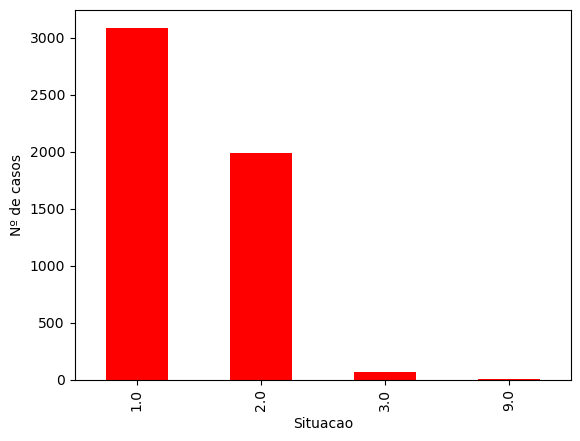

In [15]:
agrupado.plot.bar(color='red')
plt.xlabel("Situacao")
plt.ylabel("Nº de casos")
#1- CURA
#2- ÓBITO
#3- Óbito por outras causas
#9-Ignorado

In [17]:
escolaridade = vacinas.groupby(['CS_ESCOL_N']).size()
print(escolaridade)

CS_ESCOL_N
0.0     178
1.0     517
2.0     379
3.0     746
4.0     498
5.0     227
9.0    2174
dtype: int64


In [19]:
sexo = vacinas.groupby(['CS_SEXO']).size()
print(sexo)

CS_SEXO
F    2967
I       1
M    3118
dtype: int64


Text(0, 0.5, 'Quantidade')

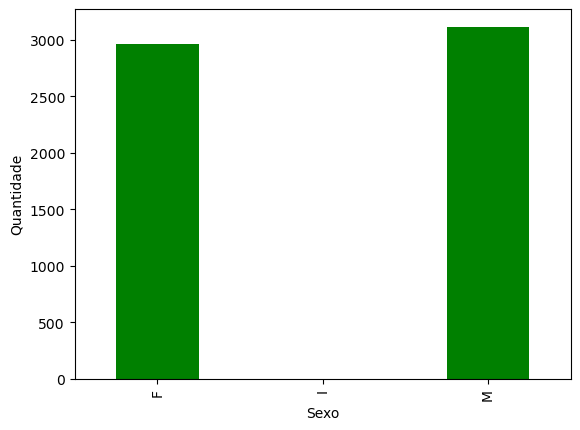

In [21]:
sexo.plot.bar(color='green')
plt.xlabel("Sexo")
plt.ylabel("Quantidade")

Text(0, 0.5, 'Quantidade')

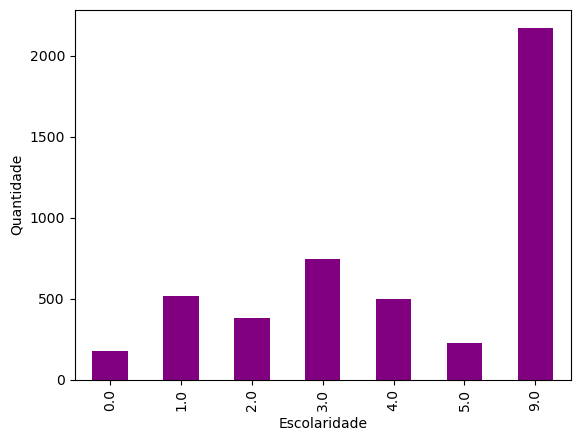

In [23]:
escolaridade.plot.bar(color='purple')
plt.xlabel("Escolaridade")
plt.ylabel("Quantidade")
#0-Sem escolaridade/Analfabeto
#1-Fundamental 1o ciclo (1a a 5a série)
#2-Fundamental 2o ciclo (6a a 9a série)
#3- Médio (1o ao 3o ano)
#4-Superior
#5-Não se aplica
#9-Ignorado
